# EXTROVERT VS INTROVERT BEHAVIOUR CLASSIFICATION DATASET

# DESCRIPTION
Overview

Dive into the Extrovert vs. Introvert Personality Traits Dataset, a rich collection of behavioral and social data designed to explore the spectrum of human personality. This dataset captures key indicators of extroversion and introversion, making it a valuable resource for psychologists, data scientists, and researchers studying social behavior, personality prediction, or data preprocessing techniques.

Context

Personality traits like extroversion and introversion shape how individuals interact with their social environments. This dataset provides insights into behaviors such as time spent alone, social event attendance, and social media engagement, enabling applications in psychology, sociology, marketing, and machine learning. Whether you're predicting personality types or analyzing social patterns, this dataset is your gateway to uncovering fascinating insights.

Dataset Details

Size: The dataset contains 2,900 rows and 8 columns.

Features:

    - Time_spent_Alone: Hours spent alone daily (0–11).
    - Stage_fear: Presence of stage fright (Yes/No).
    - Social_event_attendance: Frequency of social events (0–10).
    - Going_outside: Frequency of going outside (0–7).
    - Drained_after_socializing: Feeling drained after socializing (Yes/No).
    - Friends_circle_size: Number of close friends (0–15).
    - Post_frequency: Social media post frequency (0–10).
    - Personality: Target variable (Extrovert/Introvert).*
Data Quality: Includes some missing values, ideal for practicing imputation and preprocessing.
Format: Single CSV file, compatible with Python, R, and other tools.*

Data Quality Notes

Contains missing values in columns like Time_spent_Alone and Going_outside, offering opportunities for data cleaning practice.
Balanced classes ensure robust model training.
Binary categorical variables simplify encoding tasks.
Potential Use Cases

Build machine learning models to predict personality types.
Analyze correlations between social behaviors and personality traits.
Explore social media engagement patterns.
Practice data preprocessing techniques like imputation and encoding.
Create visualizations to uncover behavioral trends.

# 1. Importing Libraries

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 2. Reading Data

In [8]:
df = pd.read_csv('Downloads/Introvert Vs Extrovert/personality_dataset.csv')

# 3. Exploring Data

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2837 non-null   float64
 1   Stage_fear                 2827 non-null   object 
 2   Social_event_attendance    2838 non-null   float64
 3   Going_outside              2834 non-null   float64
 4   Drained_after_socializing  2848 non-null   object 
 5   Friends_circle_size        2823 non-null   float64
 6   Post_frequency             2835 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


In [13]:
df.describe()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,2837.000000,2838.000000,2834.000000,2823.000000,2835.000000
mean,4.505816,3.963354,3.000000,6.268863,3.564727
std,3.479192,2.903827,2.247327,4.289693,2.926582
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,1.000000,3.000000,1.000000
50%,4.000000,3.000000,3.000000,5.000000,3.000000
75%,8.000000,6.000000,5.000000,10.000000,6.000000
max,11.000000,10.000000,7.000000,15.000000,10.000000


In [15]:
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


In [17]:
df.tail()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
2895,3.0,No,7.0,6.0,No,6.0,6.0,Extrovert
2896,3.0,No,8.0,3.0,No,14.0,9.0,Extrovert
2897,4.0,Yes,1.0,1.0,Yes,4.0,0.0,Introvert
2898,11.0,Yes,1.0,NaN,Yes,2.0,0.0,Introvert
2899,3.0,No,6.0,6.0,No,6.0,9.0,Extrovert


In [19]:
type(df)

pandas.core.frame.DataFrame

In [21]:
df.sample(3)

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
1425,3.0,No,6.0,4.0,No,13.0,8.0,Extrovert
1635,2.0,No,4.0,6.0,No,8.0,7.0,Extrovert
1019,4.0,Yes,1.0,1.0,Yes,0.0,1.0,Introvert


In [23]:
df.dtypes

Time_spent_Alone             float64
Stage_fear                    object
Social_event_attendance      float64
Going_outside                float64
Drained_after_socializing     object
Friends_circle_size          float64
Post_frequency               float64
Personality                   object
dtype: object

In [25]:
df.shape

(2900, 8)

In [27]:
df.ndim

2

# 4. Feature Names

In [29]:
df.columns

Index(['Time_spent_Alone', 'Stage_fear', 'Social_event_attendance',
       'Going_outside', 'Drained_after_socializing', 'Friends_circle_size',
       'Post_frequency', 'Personality'],
      dtype='object')

In [32]:
df["Personality"].value_counts()

Personality
Extrovert    1491
Introvert    1409
Name: count, dtype: int64

In [34]:
df.isnull()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
2895,False,False,False,False,False,False,False,False
2896,False,False,False,False,False,False,False,False
2897,False,False,False,False,False,False,False,False
2898,False,False,False,True,False,False,False,False


In [36]:
df.isnull().any()

Time_spent_Alone              True
Stage_fear                    True
Social_event_attendance       True
Going_outside                 True
Drained_after_socializing     True
Friends_circle_size           True
Post_frequency                True
Personality                  False
dtype: bool

In [40]:
print('Missing data sum :')
df.isnull().sum()

Missing data sum :


Time_spent_Alone             63
Stage_fear                   73
Social_event_attendance      62
Going_outside                66
Drained_after_socializing    52
Friends_circle_size          77
Post_frequency               65
Personality                   0
dtype: int64

In [42]:
print('\nMissing data percentage (%):')
print(df.isnull().sum()/df.count()*100)


Missing data percentage (%):
Time_spent_Alone             2.220656
Stage_fear                   2.582243
Social_event_attendance      2.184637
Going_outside                2.328864
Drained_after_socializing    1.825843
Friends_circle_size          2.727595
Post_frequency               2.292769
Personality                  0.000000
dtype: float64


# 5. SEPARATE CATEGORICAL AND NUMERICAL FEATURES

In [44]:
cat_features = [feature for feature in df.columns if df[feature].dtypes == 'O']
print('Number of categorical variables: ', len(cat_features))
print('*'*80)
print('Categorical variables column name:',cat_features)

Number of categorical variables:  3
********************************************************************************
Categorical variables column name: ['Stage_fear', 'Drained_after_socializing', 'Personality']


In [46]:
cd = pd.DataFrame(cat_features)
cd.head()

,0
0,Stage_fear
1,Drained_after_socializing
2,Personality


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2837 non-null   float64
 1   Stage_fear                 2827 non-null   object 
 2   Social_event_attendance    2838 non-null   float64
 3   Going_outside              2834 non-null   float64
 4   Drained_after_socializing  2848 non-null   object 
 5   Friends_circle_size        2823 non-null   float64
 6   Post_frequency             2835 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


In [51]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
print('Number of numerical variables: ', len(numerical_features))
print('*'*80)
print('Numerical Variables Column: ',numerical_features)

Number of numerical variables:  5
********************************************************************************
Numerical Variables Column:  ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency']


In [53]:
print('*'*10)

**********


In [55]:
numerical_features

['Time_spent_Alone',
 'Social_event_attendance',
 'Going_outside',
 'Friends_circle_size',
 'Post_frequency']

# 6. CHECK DUPLICATE VALUES

In [60]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2895     True
2896    False
2897    False
2898    False
2899    False
Length: 2900, dtype: bool

In [64]:
df.duplicated().sum()

388

# 7. Correlation matrix

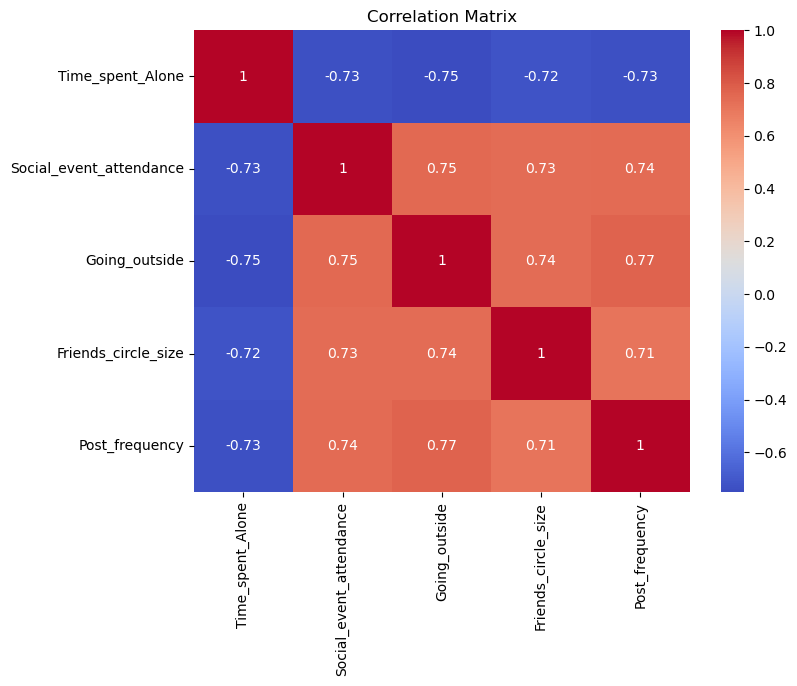

In [69]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

# 8. Plot Heatmap

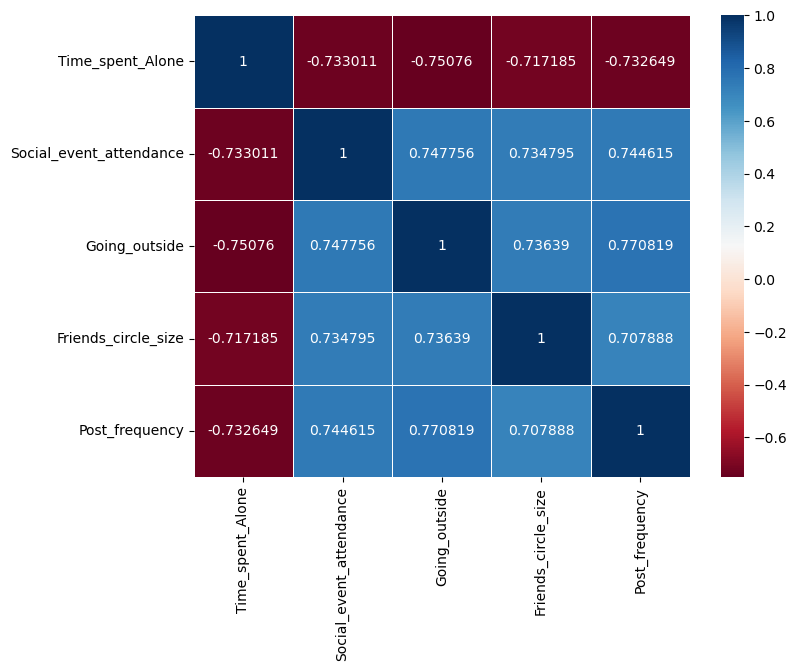

In [75]:
numeric_df = df.select_dtypes(include=['number'])
corr = numeric_df.corr()
fig = plt.figure(figsize=(8, 6))
sns.heatmap(corr, linewidths=.5, cmap="RdBu", annot=True, fmt="g")
plt.show()

<Axes: >

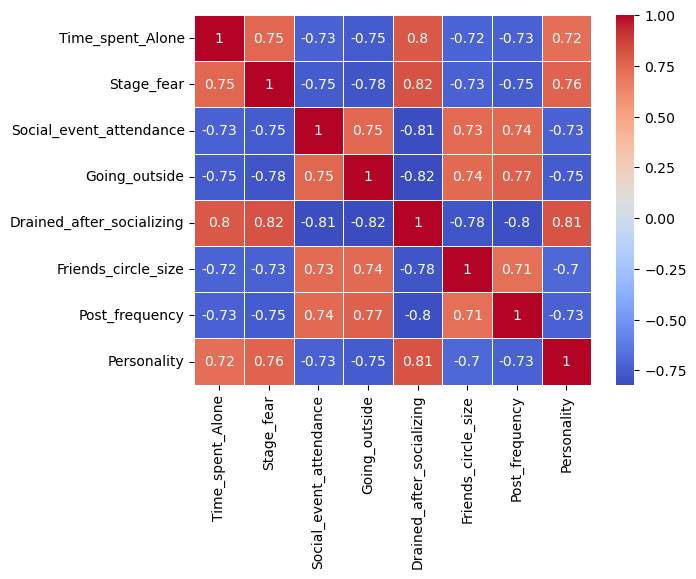

In [90]:
df_corr = df.copy()
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

for col in df_corr.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_corr[col] = le.fit_transform(df_corr[col])

corr_matrix = df_corr.corr().round(2)
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)

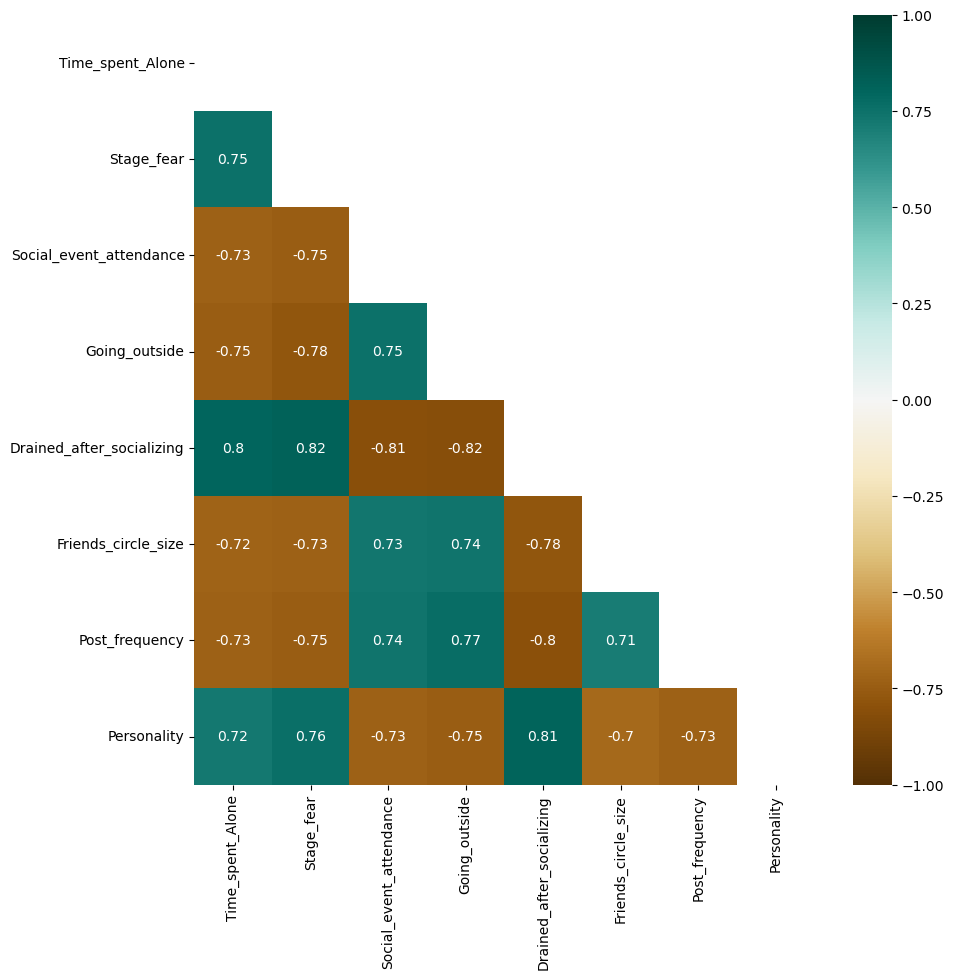

In [92]:
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, center=0, vmin=-1, vmax=1, mask=mask, annot=True, cmap='BrBG')
plt.show()

In [94]:
cat_features = [feature for feature in df.columns if df[feature].dtypes == 'O']
print('Number of categorical variables: ', len(cat_features))
print('*'*80)
print('Categorical variables column name:',cat_features)

Number of categorical variables:  3
********************************************************************************
Categorical variables column name: ['Stage_fear', 'Drained_after_socializing', 'Personality']


In [96]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
print('Number of numerical variables: ', len(numerical_features))
print('*'*80)
print('Numerical Variables Column: ',numerical_features)

Number of numerical variables:  5
********************************************************************************
Numerical Variables Column:  ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency']


# 9. Visualizing Categorical Features

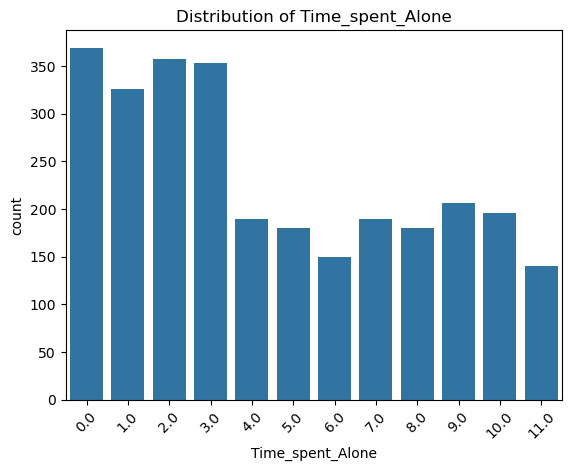

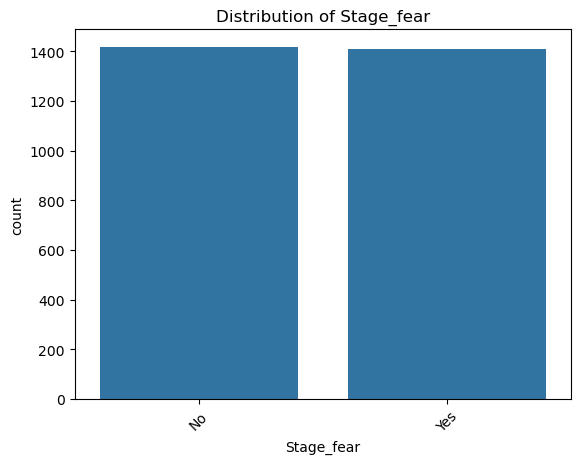

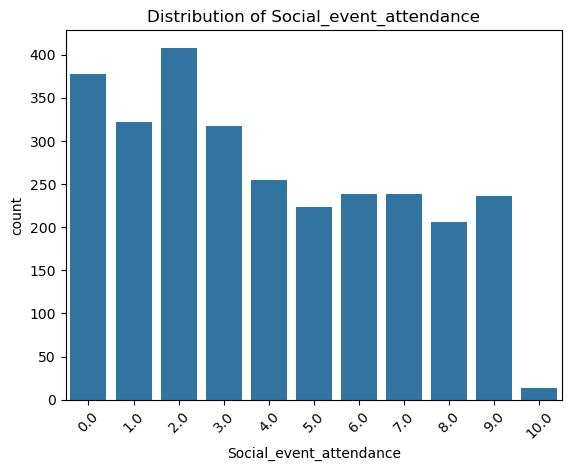

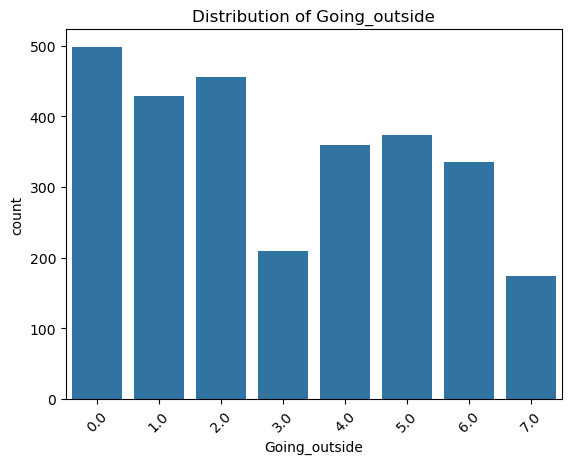

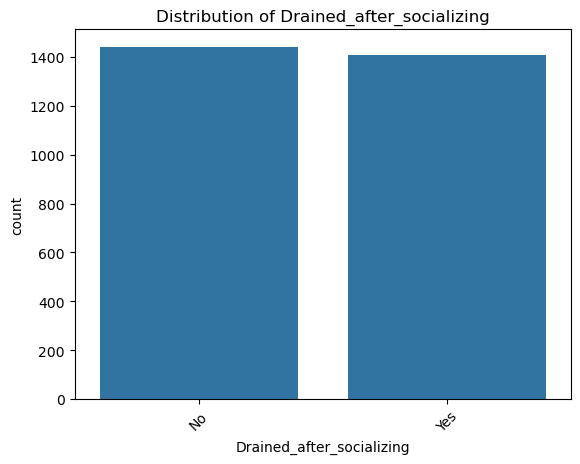

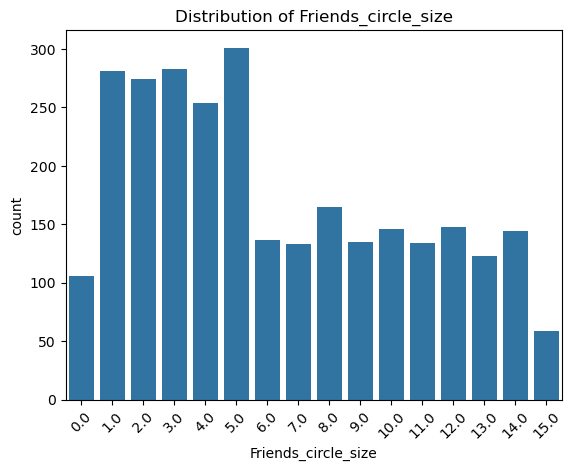

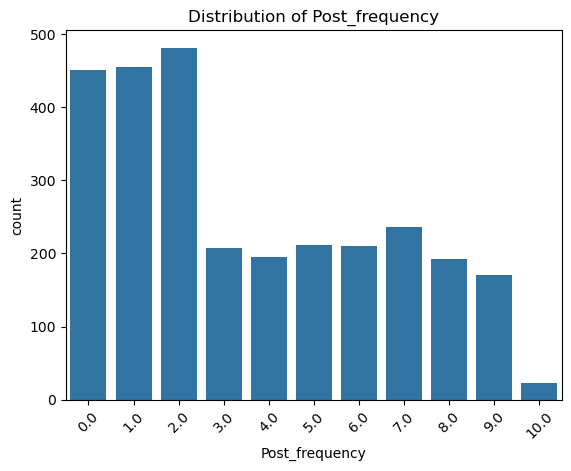

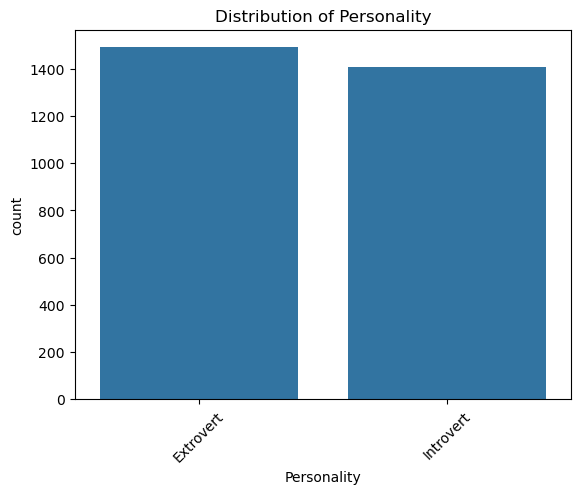

In [103]:
for col in df.columns:
    sns.countplot(x=col, data=df)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()

# 10. Barplot of Numerical Features

C:\Users\Noman\AppData\Local\Temp\ipykernel_9252\1945880710.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df,x='Going_outside',y=col,palette='gist_rainbow_r')
C:\Users\Noman\AppData\Local\Temp\ipykernel_9252\1945880710.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df,x='Going_outside',y=col,palette='gist_rainbow_r')
C:\Users\Noman\AppData\Local\Temp\ipykernel_9252\1945880710.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df,x='Going_outside',y=col,palette='gist_rainbow_r')
C:\Users\Noman\AppData\Local\Temp\ipy

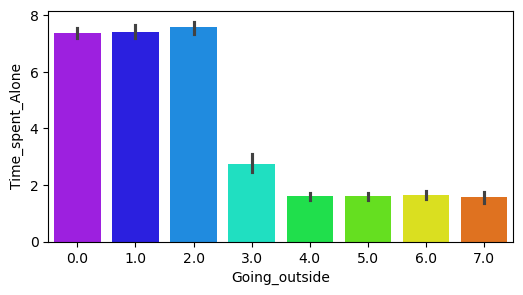

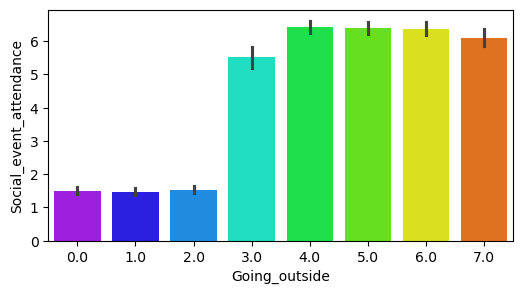

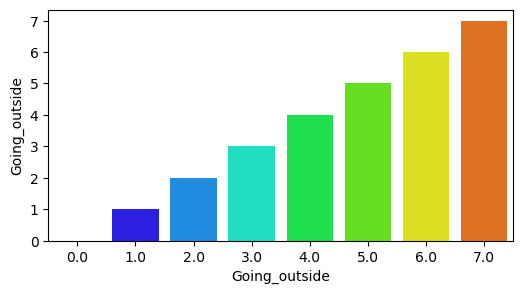

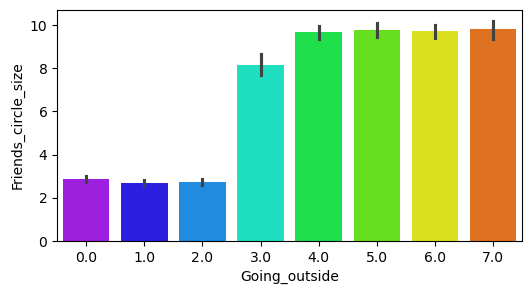

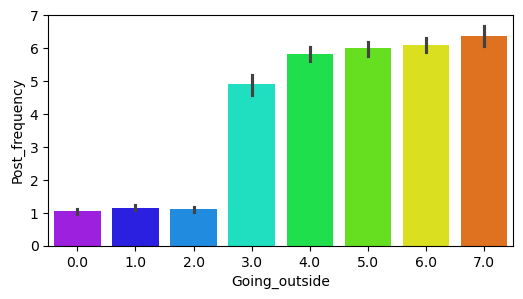

In [407]:
for col in numerical_features:
    plt.figure(figsize=(6,3), dpi=100)
    sns.barplot(data=df,x='Going_outside',y=col,palette='gist_rainbow_r')

# 11. Handling Missing Values

In [409]:
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


In [411]:
df.isnull().sum()

Time_spent_Alone              0
Stage_fear                   73
Social_event_attendance       0
Going_outside                 0
Drained_after_socializing    52
Friends_circle_size           0
Post_frequency                0
Personality                   0
dtype: int64

In [413]:
df["Going_outside"]=df["Going_outside"].fillna(df["Going_outside"].mean())

In [415]:
df["Post_frequency"]=df["Post_frequency"].fillna(df["Post_frequency"].mean())

In [417]:
df["Friends_circle_size"]=df["Friends_circle_size"].fillna(df["Friends_circle_size"].mean())

In [419]:
df["Time_spent_Alone"]=df["Time_spent_Alone"].fillna(df["Time_spent_Alone"].mean())

In [421]:
df["Social_event_attendance"]=df["Social_event_attendance"].fillna(df["Social_event_attendance"].mean())

In [423]:
df.isnull().sum()

Time_spent_Alone              0
Stage_fear                   73
Social_event_attendance       0
Going_outside                 0
Drained_after_socializing    52
Friends_circle_size           0
Post_frequency                0
Personality                   0
dtype: int64

In [425]:
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


# 12. Dropping Irrelevent Columns

In [440]:
train  = df.drop(['Personality'],axis=1)
train

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
0,4.0,No,4.0,6.0,No,13.0,5.0
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0
3,0.0,No,6.0,7.0,No,14.0,8.0
4,3.0,No,9.0,4.0,No,8.0,5.0
...,...,...,...,...,...,...,...
2895,3.0,No,7.0,6.0,No,6.0,6.0
2896,3.0,No,8.0,3.0,No,14.0,9.0
2897,4.0,Yes,1.0,1.0,Yes,4.0,0.0
2898,11.0,Yes,1.0,3.0,Yes,2.0,0.0


In [430]:
train.columns

Index(['Time_spent_Alone', 'Stage_fear', 'Social_event_attendance',
       'Going_outside', 'Drained_after_socializing', 'Friends_circle_size',
       'Post_frequency'],
      dtype='object')

In [432]:
train.shape

(2900, 7)

In [434]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2900 non-null   float64
 1   Stage_fear                 2827 non-null   object 
 2   Social_event_attendance    2900 non-null   float64
 3   Going_outside              2900 non-null   float64
 4   Drained_after_socializing  2848 non-null   object 
 5   Friends_circle_size        2900 non-null   float64
 6   Post_frequency             2900 non-null   float64
dtypes: float64(5), object(2)
memory usage: 158.7+ KB


In [436]:
train_data_cat = train.select_dtypes("object")
train_data_num = train.select_dtypes("number")

In [438]:
train_data_cat.head(3)

,Stage_fear,Drained_after_socializing
0,No,No
1,Yes,Yes
2,Yes,Yes


In [442]:
train_data_num.head(3)

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
0,4.0,4.0,6.0,13.0,5.0
1,9.0,0.0,0.0,0.0,3.0
2,9.0,1.0,2.0,5.0,2.0


# 13. Converting categorical features into numerical

In [445]:
train_data_cata_encoded=pd.get_dummies(train_data_cat, columns=train_data_cat.columns.to_list())
train_data_cata_encoded.head()

,Stage_fear_No,Stage_fear_Yes,Drained_after_socializing_No,Drained_after_socializing_Yes
0,True,False,True,False
1,False,True,False,True
2,False,True,False,True
3,True,False,True,False
4,True,False,True,False


In [447]:
data=pd.concat([train_data_cata_encoded,train_data_num],axis=1,join="outer")
data.head()

,Stage_fear_No,Stage_fear_Yes,Drained_after_socializing_No,Drained_after_socializing_Yes,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
0,True,False,True,False,4.0,4.0,6.0,13.0,5.0
1,False,True,False,True,9.0,0.0,0.0,0.0,3.0
2,False,True,False,True,9.0,1.0,2.0,5.0,2.0
3,True,False,True,False,0.0,6.0,7.0,14.0,8.0
4,True,False,True,False,3.0,9.0,4.0,8.0,5.0


In [596]:
categorical_cols = X.select_dtypes(include='object').columns
print("Categorical columns:", categorical_cols.tolist())

Categorical columns: []


In [562]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in categorical_cols:
    X[col] = le.fit_transform(X[col])

In [564]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


# 14. Separate Independent and Dependent

In [450]:
X = df.drop("Personality", axis=1)
y = df["Personality"]

In [452]:
print(X.shape)
print(y.shape)

(2900, 7)
(2900,)


# 15. Scaling Data

In [455]:
from sklearn.preprocessing import StandardScaler

x_numeric = X.select_dtypes(include=['number'])
sc = StandardScaler()
x_scaled = sc.fit_transform(x_numeric)

X

# 16. Splitting data into Training and Testing

In [459]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.svm import SVC
import pickle

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

# 17. Splitting the dataset

- training data 70%
- testing data 30%

In [463]:
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [465]:
X_train.shape, X_test.shape

((2320, 5), (580, 5))

In [ ]:
# Building Classifiers

In [468]:
accuracy = {}

# 18. Logistic Regression

In [471]:
logreg = LogisticRegression()

In [473]:
logreg.fit(X_train, y_train)

LogisticRegression()

In [475]:
y_pred_log = logreg.predict(X_test)

# 19. Confusion Matrix

<Axes: >

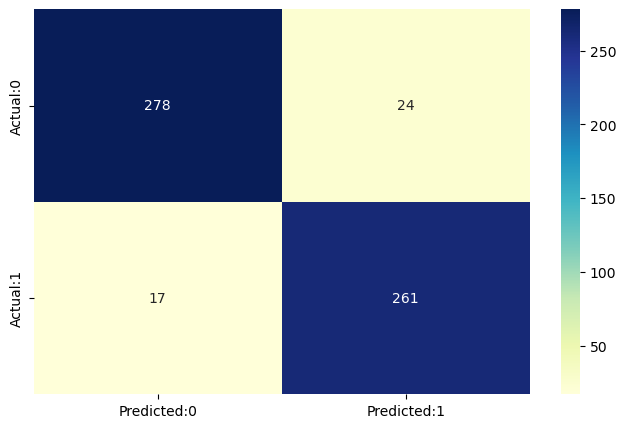

In [478]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred_log)

conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

# 20. Classification Report

In [481]:
print(classification_report(y_test,y_pred_log))

              precision    recall  f1-score   support

   Extrovert       0.94      0.92      0.93       302
   Introvert       0.92      0.94      0.93       278

    accuracy                           0.93       580
   macro avg       0.93      0.93      0.93       580
weighted avg       0.93      0.93      0.93       580



# 21. Predicting

In [484]:
y_pred_test = logreg.predict(X_test)

test = pd.DataFrame({
    'Actual':y_test,
    'Y test predicted':y_pred_test
})

In [486]:
test.sample(10)

,Actual,Y test predicted
485,Introvert,Introvert
457,Extrovert,Extrovert
1659,Introvert,Introvert
772,Extrovert,Extrovert
831,Introvert,Introvert
976,Introvert,Introvert
1385,Extrovert,Extrovert
1364,Introvert,Introvert
233,Introvert,Introvert
44,Introvert,Introvert


# 22. DecisionTreeClassifier

In [489]:
dtc = DecisionTreeCla.ssifier(max_depth=3)
dtc.fit(X_train, y_train)
y_pred2 = dtc.predict(X_test)
print(accuracy_score(y_test, y_pred2))
accuracy[str(dtc)] = accuracy_score(y_test, y_pred2)*100

0.9275862068965517


<Axes: >

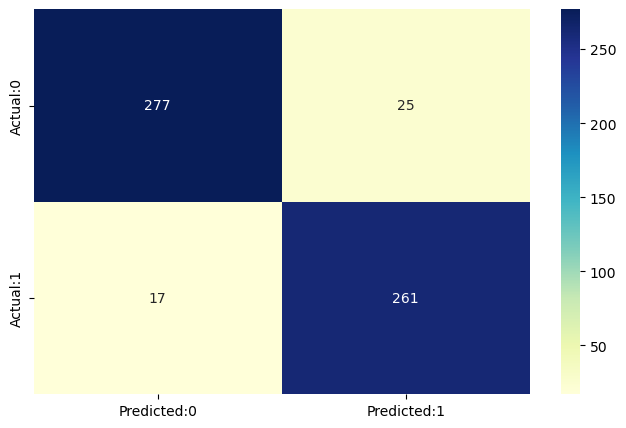

In [491]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred2)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [493]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

   Extrovert       0.94      0.92      0.93       302
   Introvert       0.91      0.94      0.93       278

    accuracy                           0.93       580
   macro avg       0.93      0.93      0.93       580
weighted avg       0.93      0.93      0.93       580



In [495]:
y_pred_test = dtc.predict(X_test)

test = pd.DataFrame({
    'Actual':y_test,
    'Y test predicted':y_pred_test
})

In [497]:
test.head(5)

,Actual,Y test predicted
141,Introvert,Introvert
1557,Extrovert,Introvert
485,Introvert,Introvert
1712,Introvert,Introvert
2250,Introvert,Introvert


In [499]:
rfc = RandomForestClassifier(max_depth=5)
rfc.fit(X_train, y_train)
y_pred3 = rfc.predict(X_test)
print(accuracy_score(y_test, y_pred3))
accuracy[str(rfc)] = accuracy_score(y_test, y_pred3)*100

0.9293103448275862


<Axes: >

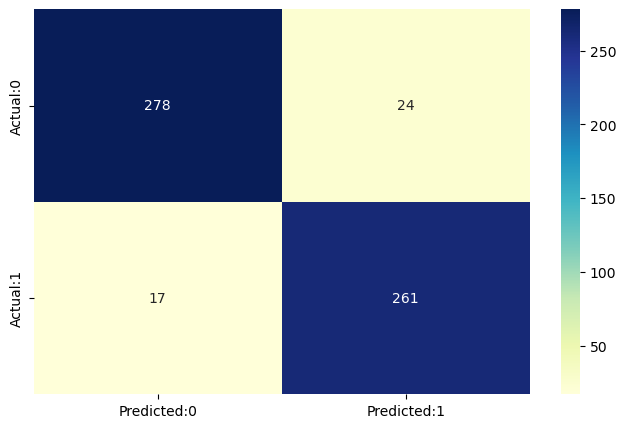

In [501]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred3)

conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [503]:
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1)
gbc.fit(X_train, y_train)
y_pred4 = gbc.predict(X_test)
print(accuracy_score(y_test, y_pred4))
accuracy[str(gbc)] = accuracy_score(y_test, y_pred4)*100

0.9293103448275862


In [ ]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred4)

conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

# 23. SVM 

In [508]:
svc = SVC()
svc.fit(X_train, y_train)
y_pred5 = svc.predict(X_test)
print(accuracy_score(y_test, y_pred5))
accuracy[str(svc)] = accuracy_score(y_test, y_pred5)*100

0.9293103448275862


<Axes: >

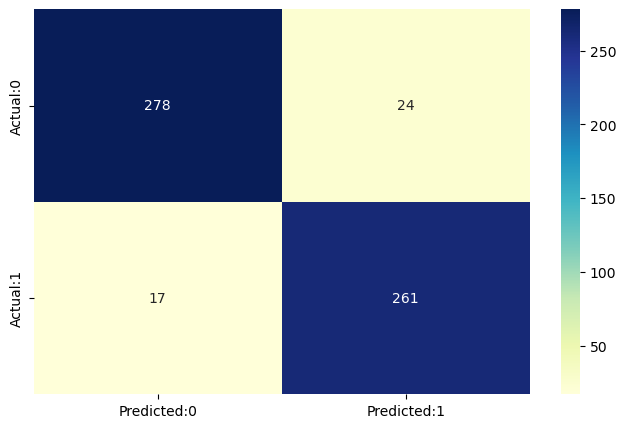

In [510]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred5)

conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [512]:
accuracy

{'DecisionTreeClassifier(max_depth=3)': 92.75862068965517,
 'RandomForestClassifier(max_depth=5)': 92.93103448275862,
 'GradientBoostingClassifier()': 92.93103448275862,
 'SVC()': 92.93103448275862}

# 24. Handling this data using SMOTE

In [517]:
from imblearn.over_sampling import SMOTE

In [519]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(x_scaled, y)

C:\Users\Noman\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


# 25. Split the oversampling data

In [522]:
X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

In [524]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2320, 5)
(580, 5)
(2320,)
(580,)


In [526]:
lr = LogisticRegression(max_iter=200)
lr.fit(X_train, y_train)
y_pred1 = lr.predict(X_test)
print(accuracy_score(y_test, y_pred1))
accuracy[str(lr)] = accuracy_score(y_test, y_pred1)*100

0.9293103448275862


<Axes: >

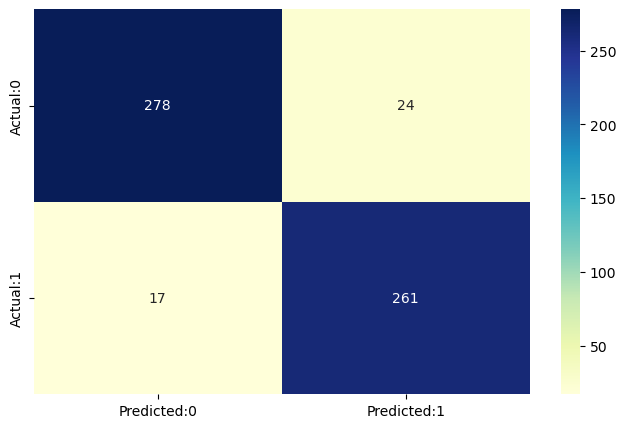

In [528]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred1)

conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [530]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

   Extrovert       0.94      0.92      0.93       302
   Introvert       0.92      0.94      0.93       278

    accuracy                           0.93       580
   macro avg       0.93      0.93      0.93       580
weighted avg       0.93      0.93      0.93       580



In [532]:
y_pred_test = lr.predict(X_test)

test = pd.DataFrame({
    'Actual':y_test,
    'Y test predicted':y_pred_test
})

In [534]:
test.head()

,Actual,Y test predicted
141,Introvert,Introvert
1557,Extrovert,Extrovert
485,Introvert,Introvert
1712,Introvert,Introvert
2250,Introvert,Introvert


In [540]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(df['Going_outside']) 

In [542]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 26. Deep Learning 

In [545]:
import tensorflow as tf
from tensorflow import keras

# 27. Create Neural Network

- Creating sequnetial ANN Network
- Creating 5 layers Network
- Activation is "Relu", "Sigmoid"
- Last layer is output layer
- Problem is binary classification thats way output node is 1 and activation is "sigmoid"

In [549]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 28. model architecture

In [570]:
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=7))  
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid')) 

C:\Users\Noman\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# 29. Compile the model

In [572]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# 30. Fit the model on training data

In [574]:
model.fit(
    X_train,
    y_train,
    epochs=100,
    batch_size=100,
    validation_split=0.2,
    verbose=1
)

Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.1457 - loss: -2.7718 - val_accuracy: 0.1509 - val_loss: -18.8994
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1576 - loss: -25.9403 - val_accuracy: 0.1509 - val_loss: -83.8229
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1459 - loss: -111.8298 - val_accuracy: 0.1509 - val_loss: -342.4336
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1458 - loss: -454.1612 - val_accuracy: 0.1509 - val_loss: -1312.2744
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1379 - loss: -1688.6377 - val_accuracy: 0.1509 - val_loss: -4442.4941
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1455 - loss: -5279.3237 - val_accuracy: 0.1509 - val_loss: -13079.4297
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1554 - loss: -14756.9482 - val_accuracy: 0.1509 - val_loss: -34014.4766
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 

# 31. Evaluate The Model

In [576]:
model.evaluate(X_test, y_test)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1736 - loss: -304708517888.0000 


[-329795239936.0, 0.14827586710453033]

In [578]:
y_pred=model.predict(X_test).flatten()
y_pred=np.round(y_pred)

y_pred[:11]
y_test[:11]

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        99
           1       0.15      1.00      0.26        86
           2       0.00      0.00      0.00        91
           3       0.00      0.00      0.00        55
           4       0.00      0.00      0.00        72
           5       0.00      0.00      0.00        75
           6       0.00      0.00      0.00        67
           7       0.00      0.00      0.00        35

    accuracy                           0.15       580
   macro avg       0.02      0.12      0.03       580
weighted avg       0.02      0.15      0.04       580



C:\Users\Noman\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Noman\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Noman\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# 32. CONFUSION MATRIX

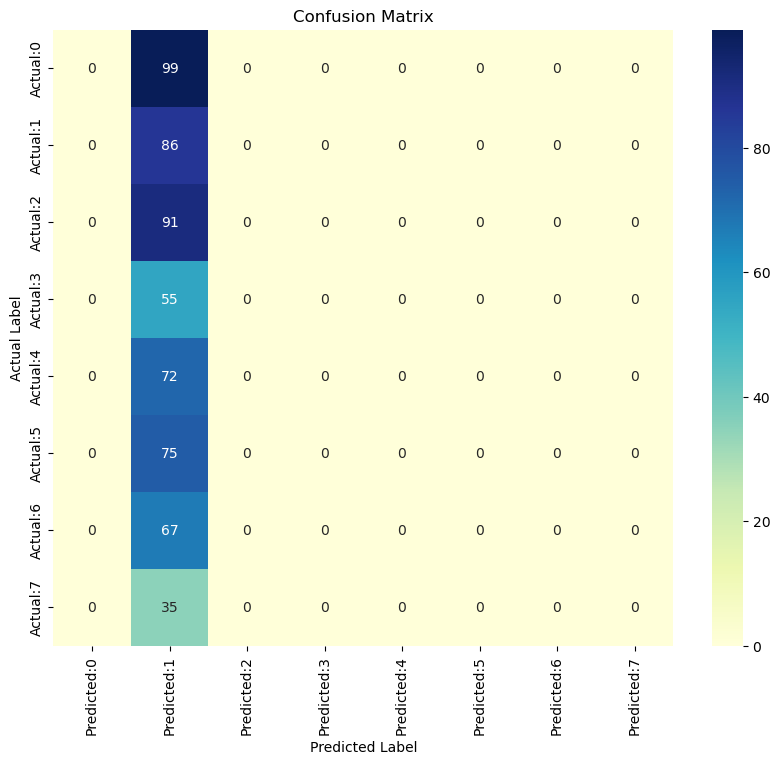

In [589]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

labels = sorted(list(set(y_test)))

conf_matrix = pd.DataFrame(data=cm,
                           columns=[f'Predicted:{l}' for l in labels],
                           index=[f'Actual:{l}' for l in labels])

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu")
plt.title("Confusion Matrix")
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")
plt.show()


# CONCLUSION

- Data Preprocessing:
Cleaned the dataset and handled categorical variables.
Ensured features were converted to numerical types for model compatibility.

- Model Building:
Created a Neural Network using Keras Sequential API.
Architecture included input, hidden, and output layers with activation functions (relu, sigmoid).

- Model Training:
Trained the model with X_train and y_train using 100 epochs and batch size of 100.
Used validation_split=0.2 to monitor validation performance.

- Predictions & Evaluation:
Made predictions on X_test.
Evaluated performance using a confusion matrix and classification metrics.

- Results:
Model successfully learned the patterns in data.
Confusion matrix shows reasonable accuracy with room for improvement in certain misclassified cases.

# THE END